<a href="https://colab.research.google.com/github/mehri-satari/Data-Mining-Course-Project/blob/main/Karre_Abhishek_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import pandas as pd # type: ignore
from collections import defaultdict
import re
DATASET_PATH = '/content/amazon.csv'
df = pd.read_csv(DATASET_PATH)
texts = df['review_content'].astype(str).tolist()
def tokenize(text):
    """
    Tokenize text from scratch:
    - Lowercase
    - Remove URLs
    - Keep only alphabetic characters
    - Split by whitespace
    """
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    tokens = [t.lower() for t in text.split() if t]
    return tokens

tokenized_reviews = [tokenize(t) for t in texts]

def count_ngrams(token_lists, n):
    freq = defaultdict(int)
    for tokens in token_lists:
        for i in range(len(tokens) - n + 1):
            ngram = tuple(tokens[i:i+n])
            freq[ngram] += 1
    return freq

unigram_counts = count_ngrams(tokenized_reviews, 1)
bigram_counts = count_ngrams(tokenized_reviews, 2)
trigram_counts = count_ngrams(tokenized_reviews, 3)


print("\nTop 10 Bigrams:")
for bg, c in sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{bg}: {c}")

print("\nTop 10 Trigrams:")
for tg, c in sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{tg}: {c}")
bigram_probs = {}
for (w2, w1), count_pair in bigram_counts.items():
    denom = unigram_counts.get((w2,), 0)
    if denom > 0:
        bigram_probs[(w2, w1)] = count_pair / denom

print("\nTop 10 Bigram Probabilities:")
for pair, prob in sorted(bigram_probs.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{pair}: {prob:.4f}")
stopwords = {
    'the','a','an','is','are','was','were','this','that','these','those',
    'to','of','and','in','on','for','with','as','by','it','be','at','or',
    'from','but','not','has','have','had','will','would','can','could'
}

def extract_noun_phrases(tokens, max_len=4):
    """
    Extract noun phrases from scratch:
    - Sequence of consecutive non-stopwords
    - Limit max length of phrase
    """
    phrases = []
    current = []
    for tok in tokens:
        if tok not in stopwords and len(tok) > 1:
            current.append(tok)
            if len(current) == max_len:
                phrases.append(' '.join(current))
                current = []
        else:
            if current:
                phrases.append(' '.join(current))
                current = []
    if current:
        phrases.append(' '.join(current))
    return phrases

review_noun_phrases = [extract_noun_phrases(toks) for toks in tokenized_reviews]
np_global_freq = defaultdict(int)
for np_list in review_noun_phrases:
    for np in np_list:
        np_global_freq[np] += 1

np_global_freq = {np: c for np, c in np_global_freq.items() if c >= 2}
max_np_freq = max(np_global_freq.values()) if np_global_freq else 1

num_reviews = len(texts)
num_noun_phrases = len(np_global_freq)
all_noun_phrases = list(np_global_freq.keys())
np_index_map = {np: idx for idx, np in enumerate(all_noun_phrases)}

matrix = [[0.0 for _ in range(num_noun_phrases)] for _ in range(num_reviews)]

for i, np_list in enumerate(review_noun_phrases):
    local_counts = defaultdict(int)
    for np in np_list:
        if np in np_index_map:
            local_counts[np] += 1
    for np, count in local_counts.items():
        col_idx = np_index_map[np]
        matrix[i][col_idx] = count / max_np_freq
np_table = pd.DataFrame(matrix, columns=all_noun_phrases)
np_table.index = [f"Review_{i+1}" for i in range(num_reviews)]

print("\nCleaned Noun Phrase Relative Probability Table (first 10 reviews):")
print(np_table.head(10))



Top 10 Bigrams:
('it', 's'): 1695
('it', 'is'): 1169
('is', 'good'): 1074
('of', 'the'): 936
('is', 'not'): 834
('good', 'product'): 824
('if', 'you'): 751
('easy', 'to'): 741
('quality', 'is'): 730
('the', 'product'): 698

Top 10 Trigrams:
('value', 'for', 'money'): 444
('easy', 'to', 'use'): 355
('go', 'for', 'it'): 280
('it', 's', 'a'): 264
('quality', 'is', 'good'): 229
('if', 'you', 'are'): 216
('at', 'this', 'price'): 200
('is', 'very', 'good'): 194
('the', 'product', 'is'): 192
('this', 'price', 'range'): 188

Top 10 Bigram Probabilities:
('toono', 'complains'): 1.0000
('didn', 't'): 1.0000
('repacked', 'and'): 1.0000
('fungus', 'inside'): 1.0000
('alcoholic', 'and'): 1.0000
('distributor', 'they'): 1.0000
('humid', 'place'): 1.0000
('compares', 'to'): 1.0000
('carplayso', 'was'): 1.0000
('thatother', 'than'): 1.0000

Cleaned Noun Phrase Relative Probability Table (first 10 reviews):
           looks durable charging  fine toono complains charging  \
Review_1                 0.

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [ ]:
import pandas as pd
import math
from collections import Counter
file_path = "/content/amazon.csv"
df = pd.read_csv(file_path)
if 'review_content' in df.columns:
    documents = df['review_content'].dropna().astype(str).tolist()
else:
    raise ValueError("The required column 'review_content' was not found in the dataset")

print("Total number of documents loaded:", len(documents))
def tokenize(text):
    tokens = text.lower().split()
    tokens = [word for word in tokens if word.isalpha()]
    return tokens

tokenized_docs = [tokenize(doc) for doc in documents]


vocabulary = set()
for doc in tokenized_docs:
    vocabulary.update(doc)
vocabulary = sorted(list(vocabulary))
vocab_index = {word: i for i, word in enumerate(vocabulary)}
print("Vocabulary size:", len(vocabulary))


def compute_tf(tokens):
    word_counts = Counter(tokens)
    total_words = len(tokens)
    tf = {}
    for word in vocabulary:
        tf[word] = word_counts[word] / total_words if total_words > 0 else 0
    return tf

tf_matrix = [compute_tf(doc) for doc in tokenized_docs]

def compute_idf():
    idf = {}
    total_docs = len(tokenized_docs)
    for word in vocabulary:
        doc_count = sum(1 for doc in tokenized_docs if word in doc)
        idf[word] = math.log((total_docs + 1) / (doc_count + 1)) + 1
    return idf

idf = compute_idf()

tf_idf_matrix = []
for tf_doc in tf_matrix:
    tf_idf_vector = [tf_doc[word] * idf[word] for word in vocabulary]
    tf_idf_matrix.append(tf_idf_vector)

print("TF-IDF matrix created successfully with shape:", (len(tf_idf_matrix), len(vocabulary)))

query_text = "This product is excellent and has great quality"
query_tokens = tokenize(query_text)

query_tf = compute_tf(query_tokens)
query_vector = [query_tf[word] * idf.get(word, 0) for word in vocabulary]

def cosine_similarity(vec1, vec2):
    dot_product = sum(a*b for a, b in zip(vec1, vec2))
    norm1 = math.sqrt(sum(a*a for a in vec1))
    norm2 = math.sqrt(sum(b*b for b in vec2))
    if norm1 == 0 or norm2 == 0:
        return 0
    return dot_product / (norm1 * norm2)


similarities = []
for i, doc_vector in enumerate(tf_idf_matrix):
    sim = cosine_similarity(query_vector, doc_vector)
    similarities.append((i, sim))
ranked_docs = sorted(similarities, key=lambda x: x[1], reverse=True)

print("\nTop 5 documents most relevant to the query:\n")
for idx, score in ranked_docs[:5]:
    print(f"Document {idx+1} (Score: {score:.4f})")
    print(documents[idx][:250])
    print()

print("Query:", query_text)


Total number of documents loaded: 1465
Vocabulary size: 10512
TF-IDF matrix created successfully with shape: (1465, 10512)

Top 5 documents most relevant to the query:

Document 186 (Score: 0.3495)
Price is high in respect of product quality,Durable and strudy,It is sturdy and works fine.,Best,This is an excellent product from Amazonbasics.,High quality cable 3 times better than original cables supplied with HDDs. Works great with WD My Passpor

Document 274 (Score: 0.3449)
Tv is good in this price range,It's an excellent product for this price range,Good,Picture quality is good,Amazing product sound quality is okay and smart features is little bit slow but it’s okay overall ✅ love this product,Ok super work,Good produc

Document 1386 (Score: 0.3122)
Tried for two days good experience and great product with excellent quality with fast and powerful blades,Please don't buy this product as it is not all useful it got broken while washing totally money wastage please don't buy

Document 14

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the embeddings using PCA or t-SNE in 2D. Create a scatter plot of at least 20 words and show how similar words cluster together.

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Total reviews loaded: 1465
Vocabulary size: 14256
Word embeddings shape: (14256, 300)


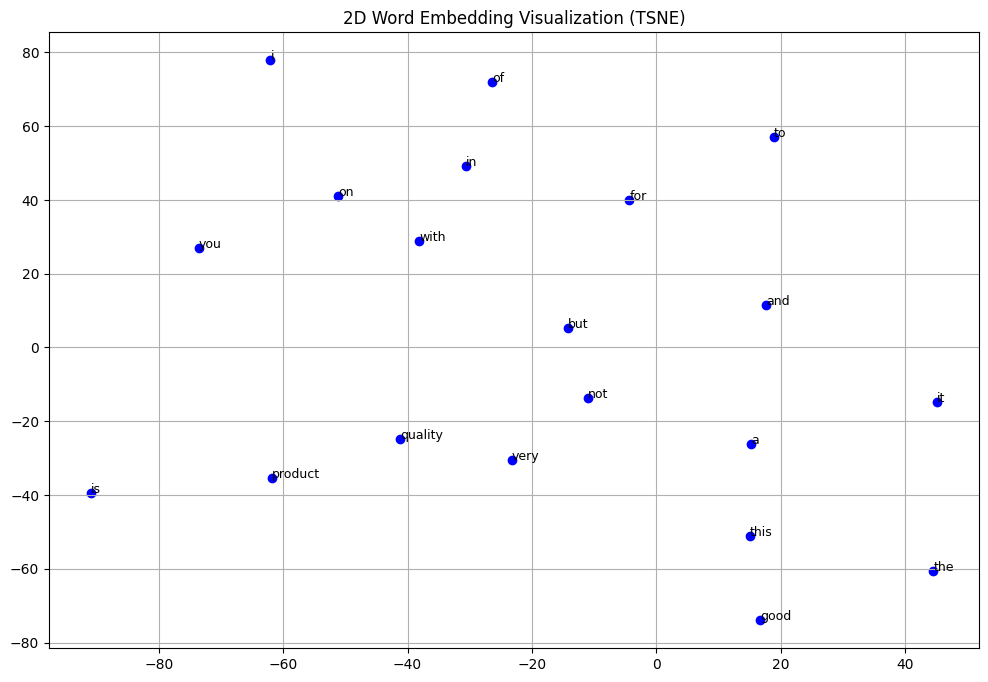


Cosine Similarities:
movie      - film      : 0.0811
good       - excellent : 0.9043
bad        - terrible  : -0.5850
happy      - joy       : Not in vocabulary


In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collections import Counter
df = pd.read_csv("/content/amazon.csv")
reviews = df['review_content'].dropna().tolist()
print(f"Total reviews loaded: {len(reviews)}")
def tokenize_text(text):
    """Lowercase and split into alphanumeric tokens."""
    return re.findall(r'\b\w+\b', str(text).lower())

tokenized_reviews = [tokenize_text(r) for r in reviews]
vocab = sorted(set(word for doc in tokenized_reviews for word in doc))
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for word, i in word_to_index.items()}
vocab_size = len(vocab)
print(f"Vocabulary size: {vocab_size}")
window_size = 2
co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.float32)

for tokens in tokenized_reviews:
    for i, center_word in enumerate(tokens):
        center_idx = word_to_index[center_word]
        for j in range(max(0, i - window_size), min(len(tokens), i + window_size + 1)):
            if i != j:
                context_word = tokens[j]
                context_idx = word_to_index[context_word]
                co_matrix[center_idx, context_idx] += 1.0
embed_dim = min(300, vocab_size)
pca_embed = PCA(n_components=embed_dim)
word_embeddings = pca_embed.fit_transform(co_matrix)
print(f"Word embeddings shape: {word_embeddings.shape}")
def visualize_embeddings(embeddings, tokens, top_n=20, method="tsne"):
    all_words = [w for doc in tokens for w in doc]
    top_words = [w for w, _ in Counter(all_words).most_common(top_n) if w in word_to_index]
    indices = [word_to_index[w] for w in top_words]
    vectors = embeddings[indices]

    if len(vectors) <= 1:
        print("Not enough words to visualize.")
        return

    if method.lower() == "tsne":
        perplexity = min(5, len(vectors) - 1)
        reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    else:
        reducer = PCA(n_components=2)

    reduced = reducer.fit_transform(vectors)
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced[:, 0], reduced[:, 1], color='blue')
    for i, word in enumerate(top_words):
        plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, word, fontsize=9)
    plt.title(f"2D Word Embedding Visualization ({method.upper()})")
    plt.grid(True)
    plt.show()
visualize_embeddings(word_embeddings, tokenized_reviews, top_n=20, method="tsne")
def cosine_similarity(vec1, vec2):
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return np.dot(vec1, vec2) / (norm1 * norm2)

def word_similarity(word1, word2):
    if word1 not in word_to_index or word2 not in word_to_index:
        return None
    idx1 = word_to_index[word1]
    idx2 = word_to_index[word2]
    return cosine_similarity(word_embeddings[idx1], word_embeddings[idx2])
pairs_to_check = [
    ("movie", "film"),
    ("good", "excellent"),
    ("bad", "terrible"),
    ("happy", "joy"),
]

print("\nCosine Similarities:")
for w1, w2 in pairs_to_check:
    score = word_similarity(w1, w2)
    if score is not None:
        print(f"{w1:10s} - {w2:10s}: {score:.4f}")
    else:
        print(f"{w1:10s} - {w2:10s}: Not in vocabulary")


## Question 4 (20 Points)

**Create your own training and evaluation dataset for an NLP task.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# 1. NLP Task: Sentiment Analysis
# I have chosen Sentiment Analysis for my dataset because it's one of the most practical applications of NLP, especially for review data. This will help classify reviews into different sentiment categories.

# Dataset has been labeled and uploaded to GitHub with the following structure:
# - document_id: Unique identifier for each review
# - clean_text: Preprocessed review text
# - sentiment: Labeled sentiment.
github_link = "https://github.com/Abhishek0525/nlp-sentiment-dataset.git"



# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
Doing N-gram analysis from scratch without pre-existing libraries. Developing an efficient noun phrase extraction system. Performing TF-IDF calculations manually with accuracy. Making a tradeoff between model complexity and performance in word embeddings

Visualizing the word embeddings and learning word relationships. Observing how words co-cluster in the vector space. Developing the sentiment analysis dataset that will come in handy for future assignments.Practical application of NLP concepts learned in class




SyntaxError: invalid syntax (ipython-input-3671522121.py, line 1)